In [1]:
import numpy as np
import matplotlib.pyplot as plt
import retro_prepare_data
import os

In [24]:
data_dir = 'datasets/retro/id014_vc'
# results_dir = 'results/exp10/exp10.65/i'
meta_data_fname = 'VC_crise1P_131127C-CEX_0000.json'
raw_seeg_fname = 'VC_crise1P_131127C-CEX_0000.raw.fif'
# os.makedirs(f'{results_dir}/Rfiles', exist_ok=True)

In [28]:
data = retro_prepare_data.prepare_data(data_dir, meta_data_fname, raw_seeg_fname, 10, 0.3)

Isotrak not found


In [29]:
data['slp'] = data['slp'][0:-1:64]
data['snsr_pwr'] = (data['slp']**2).mean(axis=0)
# data['snsr_pwr'] = data['snsr_pwr']/data['snsr_pwr'].max()
data['nt'] = data['slp'].shape[0]
data['ns'] = data['slp'].shape[1]

Text(0.5,1,'SEEG channel power')

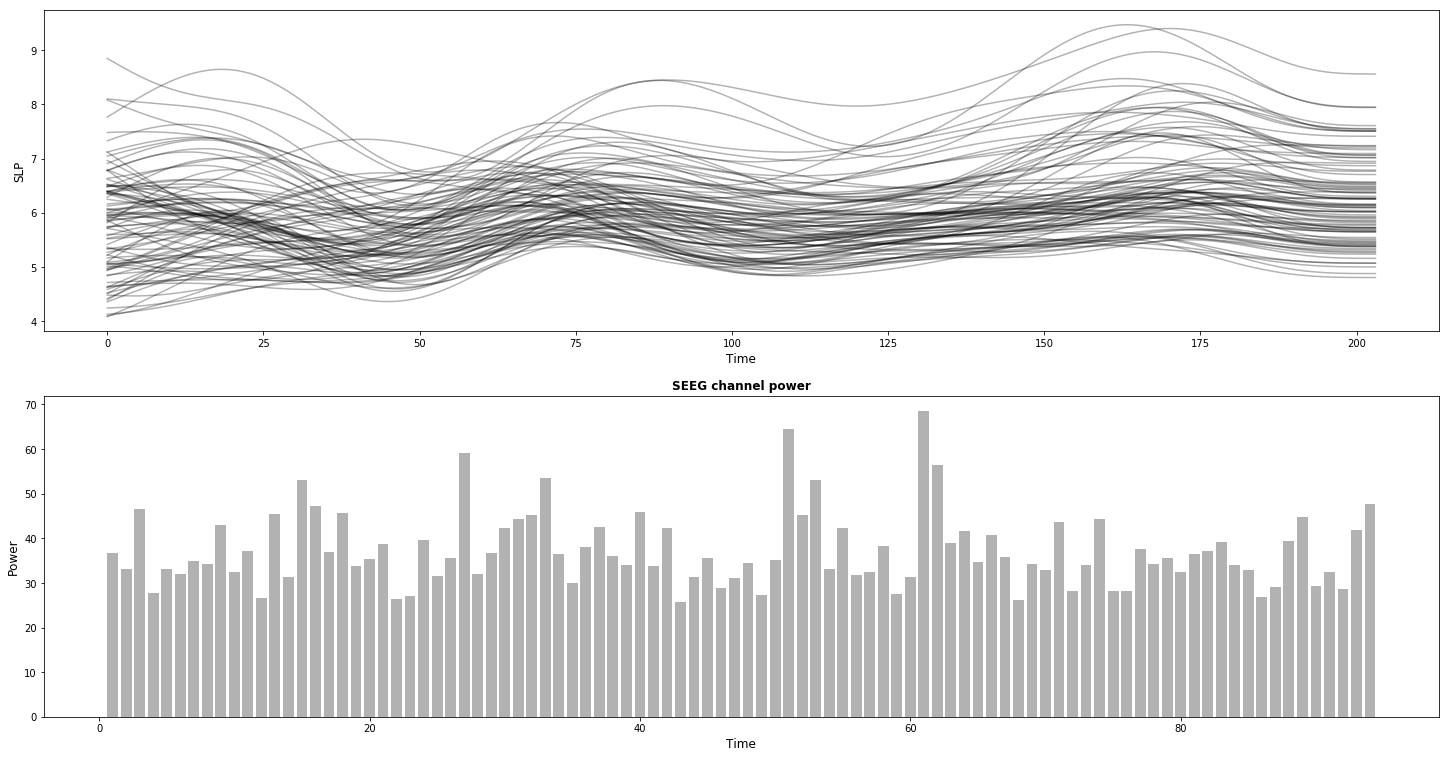

In [30]:
plt.figure(figsize=(25,13))
plt.subplot(211)
plt.plot(data['slp'], color='black', alpha=0.3);
plt.xlabel('Time', fontsize=12)
plt.ylabel('SLP', fontsize=12)

plt.subplot(212)
plt.bar(np.r_[1:data['ns']+1],data['snsr_pwr'], color='black', alpha=0.3);
plt.xlabel('Time', fontsize=12)
plt.ylabel('Power', fontsize=12)
plt.title('SEEG channel power', fontweight='bold')
# plt.savefig(f'{results_dir}/figures/fitting_target.png')
# plt.tight_layout()

In [ ]:
import numpy as np
import lib.io.stan
import glob
import matplotlib.pyplot as plt
import os

In [ ]:
npts = 150
# data_root_dir = 'datasets/retro_fitting_data'
data_root_dir = 'results/exp10/exp10.65.4'
res_root_dir = 'results/exp10/exp10.65.4'
for data_path in glob.glob(os.path.join(data_root_dir, 'id*')):
    patient_id = os.path.basename(data_path)
#     os.makedirs(os.path.join(res_root_dir, patient_id, 'Rfiles'), exist_ok=True)
#     os.makedirs(os.path.join(res_root_dir, patient_id, 'figures'), exist_ok=True)
#     os.makedirs(os.path.join(res_root_dir, patient_id, 'logs'), exist_ok=True)
#     os.makedirs(os.path.join(res_root_dir, patient_id, 'results'), exist_ok=True)
    flag = False
    for rf_path in glob.glob(os.path.join(data_path, 'Rfiles', 'obs_data*.R')):
        rfname = os.path.basename(rf_path)
        data = lib.io.stan.rload(rf_path)
#         ds_freq = int(data['nt'] / npts)
#         data['slp'] = data['slp'][::ds_freq, :]
#         data['nt'] = data['slp'].shape[0]
#         data['snsr_pwr'] = (data['slp']**2).mean(axis=0)
#         data['eps_snsr_pwr'] = 0.1
#         lib.io.stan.rdump(os.path.join(res_root_dir, patient_id, 'Rfiles', rfname), data)
        if(not flag):
            params_init = dict()
            params_init['x0_star_star'] = np.zeros(data['nn'])
            params_init['amplitude_star_star'] = 0.0
            params_init['offset_star_star'] = 0.0
            params_init['K_star_star'] = 0.0
            params_init['tau0_star_star'] = 0.0
            params_init['alpha'] = 1.0
            lib.io.stan.rdump(os.path.join(res_root_dir, patient_id, 'Rfiles', 'params_init.R'), params_init)
            flag = True

In [ ]:
plt.figure(figsize=(25,5))
plt.plot(data['slp']);
plt.figure(figsize=(25,5))
plt.bar(np.r_[1:data['ns']+1], data['snsr_pwr'])

In [ ]:
for id in glob.glob('datasets/retro_fitting_data/id*'):
    for rfile in glob.glob(f'datasets/retro_fitting_data//Rfiles/obs_data*.R'):
#         data = lib.io.stan.rload(rfile)
        print(rfile)